In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import shuffle

In [2]:
features = pd.read_excel('高温合金数据集合1.xlsx')
label1 = np.array(features['Creep life'])
label1 = np.log(label1)#取log对数
features

C-Ni   C-Cr   C-Co  C-Fe  C-Al  C-Ti  C-Nb  C-Mo  C-W    C-C  ...  \
0    57.254  19.31  13.39  1.08  1.44  3.12   0.0  4.30  0.0  0.042  ...   
1    57.254  19.31  13.39  1.08  1.44  3.12   0.0  4.30  0.0  0.042  ...   
2    57.254  19.31  13.39  1.08  1.44  3.12   0.0  4.30  0.0  0.042  ...   
3    59.345  18.30  12.77  1.06  1.37  2.84   0.0  4.27  0.0  0.037  ...   
4    59.345  18.30  12.77  1.06  1.37  2.84   0.0  4.27  0.0  0.037  ...   
..      ...    ...    ...   ...   ...   ...   ...   ...  ...    ...  ...   
260  51.204  18.77  10.88  4.50  1.52  3.10   0.0  9.87  0.0  0.080  ...   
261  51.204  18.77  10.88  4.50  1.52  3.10   0.0  9.87  0.0  0.080  ...   
262  51.204  18.77  10.88  4.50  1.52  3.10   0.0  9.87  0.0  0.080  ...   
263  51.204  18.77  10.88  4.50  1.52  3.10   0.0  9.87  0.0  0.080  ...   
264  51.204  18.77  10.88  4.50  1.52  3.10   0.0  9.87  0.0  0.080  ...   

     C-Zr  C-T  C-S   STt  STat  STat.1  Stat   AT  At  Creep life  
0    0.06  700  450  1080   4.0     845    24  760  16     1949.00  
1    0.06  725  380  1080   4.0     845    24  760  16     1550.00  
2    0.06  725  350  1080   4.0     845    24  760  16     1995.00  
3    0.00  732  517  1020   4.0     845     4  760  16       46.50  
4    0.00  815  330  1020   4.0     845     4  760  16       22.50  
..    ...  ...  ...   ...   ...     ...   ...  ...  ..         ...  
260  0.07  900  170  1120   0.5     800     8    0   0       50.45  
261  0.07  900  170  1120   0.5     800    16    0   0       48.00  
262  0.07  900  170  1120   0.5     900     1    0   0        9.68  
263  0.07  900  170  1120   0.5     900     8    0   0       25.00  
264  0.07  900  170  1120   0.5     900    16    0   0       30.06  

[265 rows x 21 columns]

In [3]:
n_samples, n_features = features.shape
features = pd.get_dummies(features)
feature_list = list(features.columns)#获取列名
features = np.array(features)#获取影响因子
from sklearn.preprocessing import MinMaxScaler, StandardScaler
features = MinMaxScaler().fit_transform(features)#将进行归一化处理
from sklearn.model_selection import train_test_split
test_ratio = 0.20#按照四比一划分数据集合；3/4的数据用于训练集合，1/4的数据用于验证集合。
SEED = 26 ### the test/train data is checked on this seed, it has similiar distribution to the whole dataset
train_features1, test_features1, train_labels1, test_labels1 = train_test_split(features, label1,
                                                                            test_size = test_ratio,
                                                                            random_state = SEED)

Best SVR Parameters: {'C': 79, 'gamma': 0.9699999999999995, 'kernel': 'rbf'}
RMSE (Train): 0.23
RMSE (Test): 0.65
R^2 (Train): 0.96
R^2 (Test): 0.70


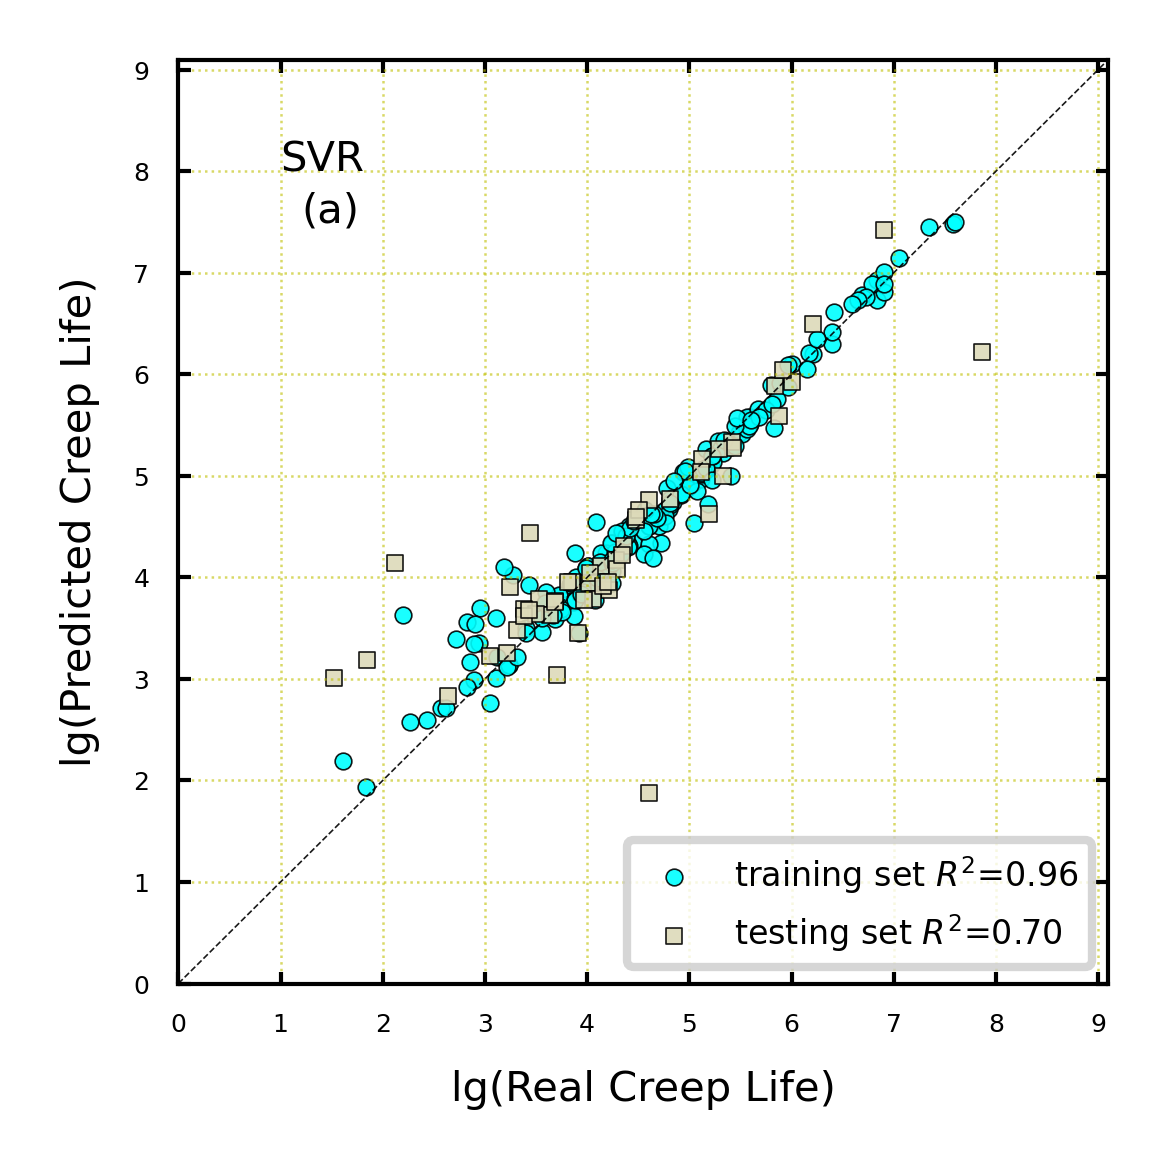

In [7]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import numpy as np
# Create and fit the SVR model
param_grid = {
    'C': np.arange(1, 101, 1),
    'gamma': np.arange(0.1, 1.01, 0.01),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svr = SVR()
grid_search = GridSearchCV(svr, param_grid, cv=5, n_jobs=-1)
grid_search.fit(train_features1, train_labels1)

# Get the best SVR model from the grid search
best_svr = grid_search.best_estimator_
train_predicted_creeplife = best_svr.predict(train_features1)
test_predicted_creeplife = best_svr.predict(test_features1)

# Calculate performance metrics
rmse_tr_rf = mean_squared_error(train_labels1, train_predicted_creeplife, squared=False)
rmse_te_rf = mean_squared_error(test_labels1, test_predicted_creeplife, squared=False)
r2_tr_rf = r2_score(train_labels1, train_predicted_creeplife)
r2_te_rf = r2_score(test_labels1, test_predicted_creeplife)

# Define a function for MAPE (assuming you have this function defined)
def mape_function(predicted, actual):
    # Your MAPE calculation logic here
    pass

mape_tr_rf = mape_function(train_predicted_creeplife, train_labels1)
mape_te_rf = mape_function(test_predicted_creeplife, test_labels1)

# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(0, 15, 1))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 9.1], [0, 9.1], 'k--', linewidth='0.2', alpha=0.9)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels1, train_predicted_creeplife, alpha=0.9, s=4, linewidths=0.2, c='#00ffFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.2f' % r2_tr_rf, marker='o')
plt.scatter(test_labels1, test_predicted_creeplife, alpha=0.9, s=4, linewidths=0.2, c='#DDDAB9',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.2f' % r2_te_rf, marker='s')

plt.ylim(0,9.1)
plt.xlim(0,9.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
print("Best SVR Parameters:", grid_search.best_params_)
print("RMSE (Train): {:.2f}".format(rmse_tr_rf))
print("RMSE (Test): {:.2f}".format(rmse_te_rf))
print("R^2 (Train): {:.2f}".format(r2_tr_rf))
print("R^2 (Test): {:.2f}".format(r2_te_rf))
# Display the plot
plt.xlabel('lg(Real Creep Life)', size=5)
plt.ylabel('lg(Predicted Creep Life)', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(1,8.0, 'SVR', fontsize=5)
plt.text(1.20,7.5, '(a)', fontsize=5)
plt.show()

Best SVR Parameters: {'C': 79, 'gamma': 0.9699999999999995, 'kernel': 'rbf'}
RMSE (Train): 0.2270
RMSE (Test): 0.6470
R^2 (Train): 0.9581
R^2 (Test): 0.6992


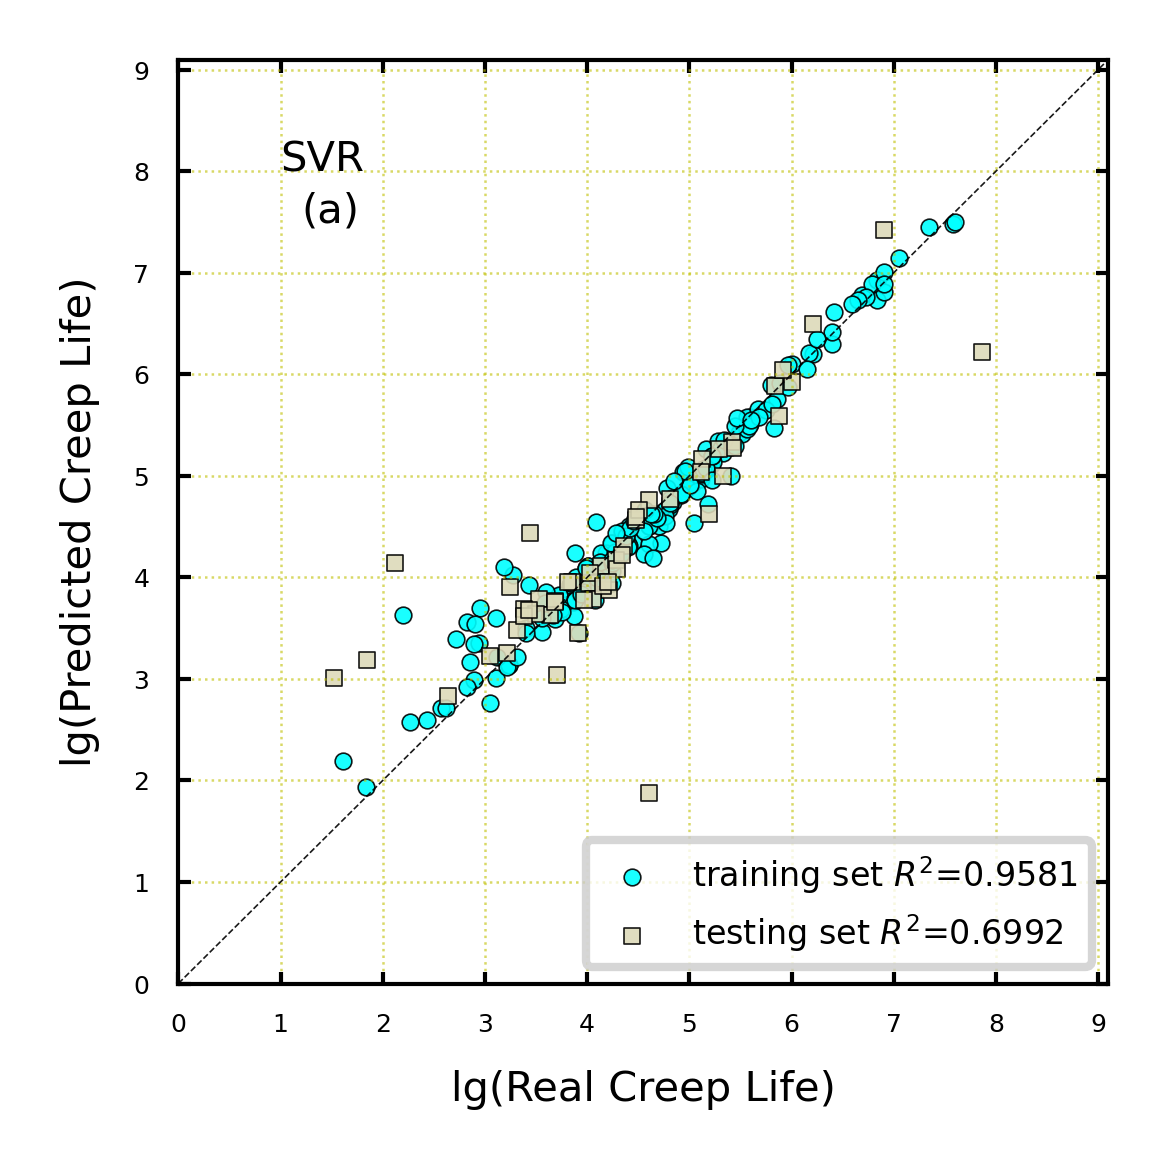

In [8]:
# Get the best SVR model from the grid search
best_svr = grid_search.best_estimator_
train_predicted_creeplife = best_svr.predict(train_features1)
test_predicted_creeplife = best_svr.predict(test_features1)

# Calculate performance metrics
rmse_tr_rf = mean_squared_error(train_labels1, train_predicted_creeplife, squared=False)
rmse_te_rf = mean_squared_error(test_labels1, test_predicted_creeplife, squared=False)
r2_tr_rf = r2_score(train_labels1, train_predicted_creeplife)
r2_te_rf = r2_score(test_labels1, test_predicted_creeplife)

# Define a function for MAPE (assuming you have this function defined)
def mape_function(predicted, actual):
    # Your MAPE calculation logic here
    pass

mape_tr_rf = mape_function(train_predicted_creeplife, train_labels1)
mape_te_rf = mape_function(test_predicted_creeplife, test_labels1)

# Set up the plot with a light blue background
plt.rcParams['figure.figsize'] = (2.0, 2.0)
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['figure.dpi'] = 600

ax = plt.axes()
ax.set_facecolor("white")  # Light blue color
plt.grid()
plt.tick_params(grid_color='y', grid_alpha=0.6, grid_linewidth=0.3, grid_linestyle=':')
ax.spines['bottom'].set_linewidth('0.5')
ax.spines['bottom'].set_linestyle("-")
ax.spines['bottom'].set_color('black')
ax.spines['left'].set_linewidth('0.5')
ax.spines['left'].set_linestyle("-")
ax.spines['left'].set_color('black')
ax.spines['top'].set_linewidth('0.5')
ax.spines['top'].set_linestyle("-")
ax.spines['top'].set_color('black')
ax.spines['right'].set_linewidth('0.5')
ax.spines['right'].set_linestyle("-")
ax.spines['right'].set_color('black')

# Set the x-axis and y-axis to a logarithmic scale with intervals of 10
new_ticks = list(np.arange(0, 15, 1))
plt.xticks(new_ticks, fontsize=3)
plt.yticks(new_ticks, fontsize=3)
plt.plot([0, 9.1], [0, 9.1], 'k--', linewidth='0.2', alpha=0.9)
# Plot the training set with circles and testing set with triangles
plt.scatter(train_labels1, train_predicted_creeplife, alpha=0.9, s=4, linewidths=0.2, c='#00ffFF',
            edgecolor='#000000', label='training set' + ' ' + '$R^2$=%.4f' % r2_tr_rf, marker='o')
plt.scatter(test_labels1, test_predicted_creeplife, alpha=0.9, s=4, linewidths=0.2, c='#DDDAB9',
            edgecolor='#000000', label='testing set' + ' ' + '$R^2$=%.4f' % r2_te_rf, marker='s')

plt.ylim(0,9.1)
plt.xlim(0,9.1)
# 添加图例
plt.legend(loc='lower right', fontsize=4)
# 显示性能指标
print("Best SVR Parameters:", grid_search.best_params_)
print("RMSE (Train): {:.4f}".format(rmse_tr_rf))
print("RMSE (Test): {:.4f}".format(rmse_te_rf))
print("R^2 (Train): {:.4f}".format(r2_tr_rf))
print("R^2 (Test): {:.4f}".format(r2_te_rf))
# Display the plot
plt.xlabel('lg(Real Creep Life)', size=5)
plt.ylabel('lg(Predicted Creep Life)', size=5)
plt.tick_params(which='major', direction='in', length=1.5, width=0.5, color='black', top=True, right=True)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')
plt.text(1,8.0, 'SVR', fontsize=5)
plt.text(1.20,7.5, '(a)', fontsize=5)
plt.show()